# Basic Imports

In [5]:
#importing Libraries
import numpy as np
import pandas as pd
from scipy import optimize as opt
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

# Regularized Linear Regression

In [6]:
#load data and to numpy array
data=sio.loadmat('./ex5/ex5data1')
x=data['X']
y=data['y']
test_x=data['Xtest']
test_y=data['ytest']
cross_x=data['Xval']
cross_y=data['yval']
x=np.c_[np.ones(12),x]
cross_x=np.c_[np.ones(21),cross_x]
test_x=np.c_[np.ones(21),test_x]

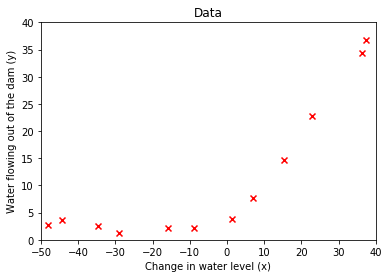

In [9]:
def plotdata(x,y):
    plt.scatter(x[:,1],y,marker='x',color='red')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlim(-50,40)
    plt.ylim(0,40)
    plt.title('Data')
    plt.show()
plotdata(x,y)

In [10]:
m,n=x.shape
theta_init=np.ones([n,1])

In [11]:
#cost function
def cost (theta,x,y,lamda):
    m,n=x.shape
    ans = np.linalg.norm(x.dot(theta)-y)**2
    temp2=lamda*(np.linalg.norm(theta[1:]))**2
    return (ans+temp2)/(2*m)
cost(theta_init,x,y,1)

303.99319222026423

In [12]:
#linear regression gradient
def gradient(theta, x, y,lamda):
    m,n=x.shape
    ans = np.zeros([m,1])
    ans = ((1/m) * x.T @ (x @ theta - y))
    ans[1:]+=theta[1:]*(lamda/m)
    return ans.flatten()
gradient(theta_init,x,y,1)

array([-15.30301567, 598.25074417])

In [13]:
def lr_reg (x,y,lamda):
    m,n=x.shape
    theta=np.ones([n,1])
    output = opt.fmin_cg(cost, x0 = theta.flatten(), fprime = gradient,args = (x, y.flatten(), lamda),disp=False)
    fit_theta = output.reshape(n,1)
    return fit_theta
lr_reg(x,y,0)

array([[13.08790734],
       [ 0.36777925]])

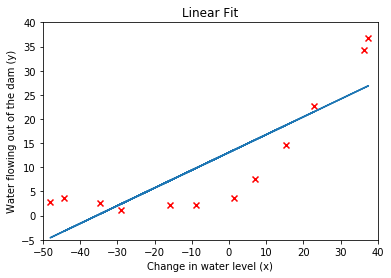

In [14]:
def plot_fit_lr(x,y,lamda):
    m,n=x.shape
    plt.scatter(x[:,1],y,marker='x',color='red')
    
    fit_theta=lr_reg(x,y,lamda)
    y_pred=x.dot(fit_theta)
    plt.plot(x[:,1],y_pred)
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlim(-50,40)
    plt.ylim(-5,40)
    plt.title('Linear Fit')
    plt.show()
plot_fit_lr(x,y,0)

In [15]:
fit_theta=lr_reg(x,y,0)
cost(fit_theta,x,y,0)

22.373906495116028

# Bias-variance

In [16]:
def error (theta,x,y):
    m,n=x.shape
    ans=np.linalg.norm(x.dot(theta)-y)**2
    return ans/(2*m)

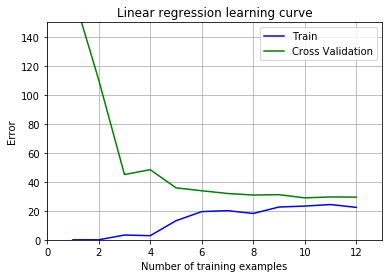

In [17]:
def learningcurve (x,y,cross_x,cross_y):
    train_err=[]
    cross_err=[]
    for i in range(1,m+1):
        n_theta=lr_reg(x[:i,:],y[:i,:],0)
        train_err.append(error(n_theta,x[:i,:], y[:i,:]))
        cross_err.append(error(n_theta,cross_x,cross_y))
    t_e=np.array(train_err)
    c_e=np.array(cross_err)
    n_eg=np.arange(1,m+1)
    plt.plot(n_eg,t_e,color='blue')
    plt.plot(n_eg,c_e,color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.xlim(0,13)
    plt.ylim(0,150)
    plt.title('Linear regression learning curve')
    plt.legend(['Train','Cross Validation'],loc='upper right')
    plt.grid(True)
    plt.show()
learningcurve(x,y,cross_x,cross_y)

# Polynomial regression

In [18]:
def polyfeatures (x,p):
    x1=x[:,1]
    for i in range(2,p+1):
        x=np.c_[x,x1**i]
    return x

In [19]:
def normalize (x):
    vec=x.copy()
    means=np.mean(vec,axis=0)
    std=np.std(vec,axis=0)
    vec[:,1:]=vec[:,1:]-means[1:]
    if std.any()==0:
        return vec
    else:
        vec[:,1:]=vec[:,1:]/std[1:]
        return vec

In [20]:
def poly_reg (x,y,p,lamda):
    x1=polyfeatures(x,p)
    x1=normalize(x1)
    fit_theta = lr_reg(x1,y,lamda)
    return fit_theta
poly_reg(x,y,6,0)

array([[ 11.21758315],
       [ 10.88776444],
       [ 12.86243012],
       [ 10.28015536],
       [ -4.20410795],
       [-11.40882899],
       [ -4.8994856 ]])

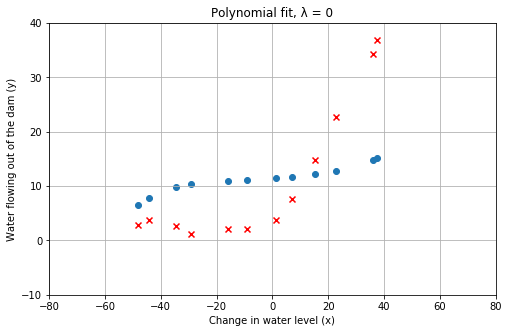

In [21]:
def plot_fit_pr(x,y,p,lamda):
    
    m,n=x.shape
    plt.figure(figsize=(8,5))
    plt.scatter(x[:,1],y,marker='x',color='red')
    
    fit_theta=poly_reg(x,y,p,lamda)
    x1=polyfeatures(x,p)
    x1=normalize(x1)
    y_pred=x1.dot(fit_theta)
    
    plt.scatter(x[:,1],y_pred)
    
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    plt.grid(True)
    plt.xlim(-80,80)
    plt.ylim(-10,40)
    plt.title('Polynomial fit, λ = 0')
    plt.show()
plot_fit_pr(x,y,8,100)

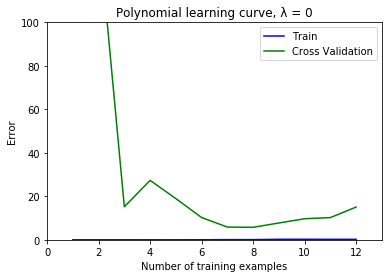

[138.82523751 142.52500868  15.18864438  27.32773744  18.95812674
  10.25220278   5.85560452   5.74866949   7.72912505   9.6853027
  10.2104586   15.05723384]


In [22]:
def lcpr (x,y,cross_x,cross_y,p,lamda):
    train_err=[]
    cross_err=[]
    x2=polyfeatures(cross_x,p)
    x2=normalize(x2)
    for i in range(1,13):
        n_theta=poly_reg(x[:i,:],y[:i,:],p,lamda)
        
        x1=polyfeatures(x[:i,:],p)
        x1=normalize(x1)
        
        train_err.append(error(n_theta,x1, y[:i,:]))
        cross_err.append(error(n_theta,x2,cross_y))
    t_e=np.array(train_err)
    c_e=np.array(cross_err)
    n_eg=np.arange(1,m+1)
    plt.plot(n_eg,t_e,color='blue')
    plt.plot(n_eg,c_e,color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.xlim(0,13)
    plt.ylim(0,100)
    plt.title('Polynomial learning curve, λ = 0')
    plt.legend(['Train','Cross Validation'],loc='upper right')
    plt.show()
    print(c_e)
lcpr(x,y,cross_x,cross_y,8,0.01)